# ch03 분류

- 가장 일반적인 지도 학습 작업이 회귀(예측)와 분류(클래스 예측)

## 지도학습

- 머신러닝 시스템을 학습하는 동안의 감독 형태나 정보량에 따라 분류한 것
- 지도학습, 비지도 학습, 준지도 학습, 강화 학습으로 나눌 수 있다.

### 지도 학습 supervised learning

- 지도 학습에는 알고리즘에 주입하는 훈련 데이터에 레이블이라는 원하는 답이 포함된다.

## 3.1 MNIST

- 사이킷런에서 제공하는 핼퍼 함수를 사용하여 데이터셋을 받을 수 있다.

In [2]:
# from sklearn.datasets import fetch_mldata
# mnist = fetch_mldata('MNIST original')

In [8]:
import numpy as np 
import matplotlib.pyplot as plt

# Used for Confusion Matrix
from sklearn import metrics
import seaborn as sns

# Used for Loading MNIST
from struct import unpack

In [9]:
def loadmnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

In [10]:
train_img, train_lbl = loadmnist('./data/train-images.idx3-ubyte'
                                 , './data/train-labels.idx1-ubyte')
test_img, test_lbl = loadmnist('./data/t10k-images.idx3-ubyte'
                               , './data/t10k-labels.idx1-ubyte')

- train img 60000개, 각 이미지에는 784개의 특성이 있다.
- 이미지가 `28 * 28` 픽셀이기 때문에 784개
- 각 특성은 단순히 0(흰색)부터 255(검은색)까지의 픽셀 강도를 나타낸다.

In [11]:
train_img.shape

(60000, 784)

In [12]:
test_lbl.shape

(10000,)

In [13]:
test_img.shape

(10000, 784)

- 샘플의 특성 벡터를 추출해서 `28 * 28` 배열로 크기를 바꾸고 matplotlib의 imshow() 함수를 사용해 그려보자.

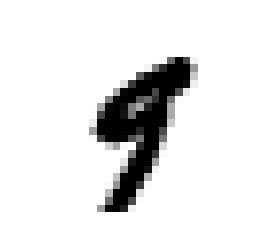

In [17]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = train_img[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
           interpolation='nearest')
plt.axis('off')
plt.show()

- 실제 레이블을 확인해보자.

In [18]:
train_lbl[36000]

9

In [19]:
28*28

784